# SWI - Lista zadań 2
Maciej Jur (246722)

## 1. Opisz krótko technologię/język, w której zadania są zaimplementowane.
- Python 3.10.7
- Jupyter Notebook
- Pandas
- NLTK
- matplotlib

In [1]:
import pandas as pd
import nltk
import re

### 2. Wybierz zbiór 10 dokumentów (tekstów), każdy o wielkości powyżej 700 słów np. artykułów naukowych

Wybrano Agendy dostępne tutaj:  
https://joint-research-centre.ec.europa.eu/language-technology-resources/dcep-digital-corpus-european-parliament_en

In [2]:
DOCUMENTS = [
  "data/33695617__AGENDA__20120417__EN.txt", # 1
  "data/33522030__AGENDA__20120328__EN.txt", # 2
  "data/33341201__AGENDA__20120312__EN.txt", # 3
  "data/33119249__AGENDA__20120213__EN.txt", # 4
  "data/33005308__AGENDA__20120201__EN.txt", # 5
  "data/32858414__AGENDA__20120116__EN.txt", # 6
  "data/32453686__AGENDA__20111212__EN.txt", # 7
  "data/32262848__AGENDA__20111130__EN.txt", # 8
  "data/32089495__AGENDA__20111114__EN.txt", # 9
  "data/31793410__AGENDA__20111024__EN.txt", # 10
]

### 3. Tabela wyrazów

In [3]:
stemmer = nltk.stem.SnowballStemmer(language="english")

out = []
for doc in DOCUMENTS:
  with open(doc) as f:
    words = re.findall(r"[a-zA-Z]+", f.read())
    unique = set(words)
    stemmed = set(stemmer.stem(word) for word in unique)
    out.append([doc, len(words), len(unique), len(stemmed)])

pd.DataFrame(data=out, columns=["Nazwa dokumentu", "Liczba słów", "Liczba różnych słów", "Liczba różnych termów"])

,Nazwa dokumentu,Liczba słów,Liczba różnych słów,Liczba różnych termów
0,data/33695617__AGENDA__20120417__EN.txt,2303,439,394
1,data/33522030__AGENDA__20120328__EN.txt,2592,416,365
2,data/33341201__AGENDA__20120312__EN.txt,4763,501,428
3,data/33119249__AGENDA__20120213__EN.txt,6504,697,584
4,data/33005308__AGENDA__20120201__EN.txt,2337,350,294
5,data/32858414__AGENDA__20120116__EN.txt,2491,387,327
6,data/32453686__AGENDA__20111212__EN.txt,10361,850,733
7,data/32262848__AGENDA__20111130__EN.txt,3321,452,390
8,data/32089495__AGENDA__20111114__EN.txt,7944,865,740
9,data/31793410__AGENDA__20111024__EN.txt,6357,732,603


### 4. Tabela wystąpień termów

In [4]:
def term_count(doc: str) -> tuple[pd.Series, pd.DataFrame]:
  with open(doc) as f:
    words = re.findall(r"[a-zA-Z]+", f.read())
  series = pd.value_counts([stemmer.stem(word) for word in words], sort=True)
  return series, series.to_frame(name=doc)

#### Dokument 1

In [5]:
s, df = term_count(DOCUMENTS[0])
df

,data/33695617__AGENDA__20120417__EN.txt
of,149
the,143
on,106
and,89
committe,64
...,...
schmidt,1
market,1
consum,1
protect,1


<Axes: >

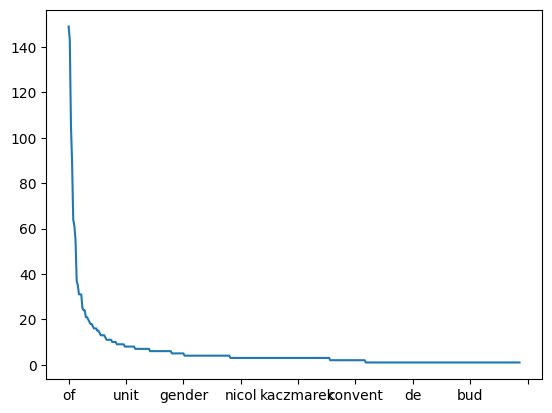

In [6]:
s.plot(kind="line")

#### Dokument 2

In [7]:
s, df = term_count(DOCUMENTS[1])
df

,data/33522030__AGENDA__20120328__EN.txt
the,128
on,120
for,110
of,109
and,103
...,...
mean,1
within,1
individu,1
eighteenth,1


<Axes: >

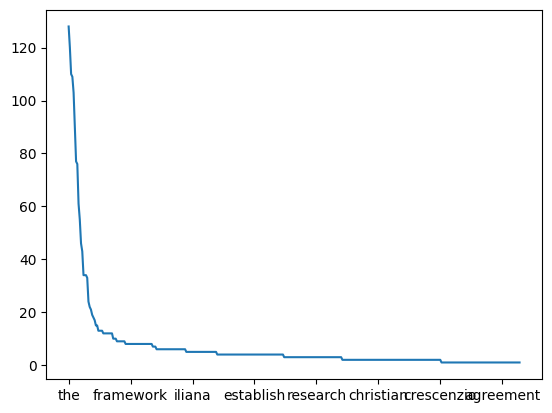

In [8]:
s.plot(kind="line")

#### Dokument 3

In [9]:
s, df = term_count(DOCUMENTS[2])
df

,data/33341201__AGENDA__20120312__EN.txt
the,259
of,213
and,206
for,172
on,159
...,...
bieta,1
el,1
econ,1
imm,1


<Axes: >

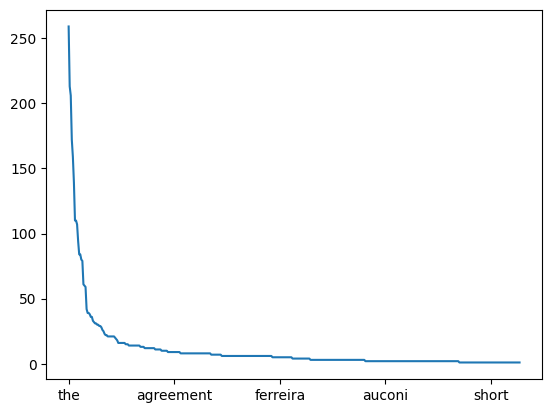

In [10]:
s.plot(kind="line")

#### Dokument 4

In [11]:
s, df = term_count(DOCUMENTS[3])
df

,data/33119249__AGENDA__20120213__EN.txt
the,417
of,362
and,308
on,239
for,183
...,...
assist,1
exercis,1
it,1
execut,1


<Axes: >

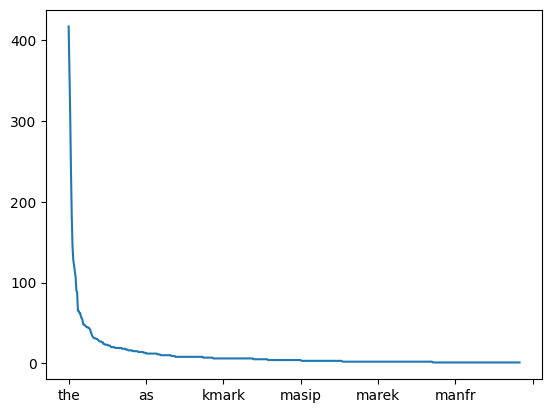

In [12]:
s.plot(kind="line")

#### Dokument 5

In [13]:
s, df = term_count(DOCUMENTS[4])
df

,data/33005308__AGENDA__20120201__EN.txt
the,114
on,104
of,95
and,89
committe,77
...,...
minut,1
speech,1
opinion,1
explan,1


<Axes: >

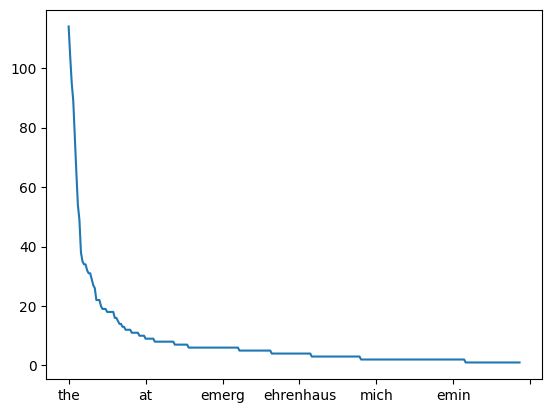

In [14]:
s.plot(kind="line")

#### Dokument 6

In [15]:
s, df = term_count(DOCUMENTS[5])
df

,data/32858414__AGENDA__20120116__EN.txt
the,187
of,162
and,120
on,97
a,63
...,...
part,1
next,1
held,1
will,1


<Axes: >

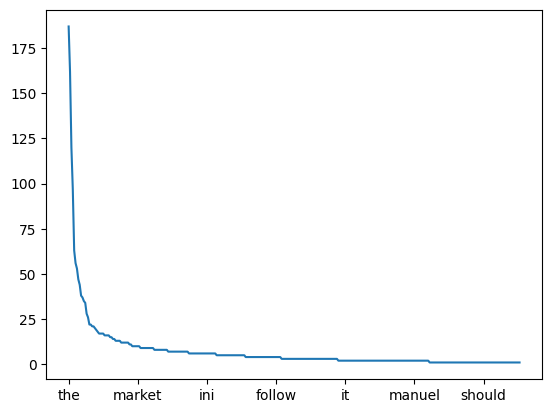

In [16]:
s.plot(kind="line")

#### Dokument 7

In [17]:
s, df = term_count(DOCUMENTS[6])
df

,data/32453686__AGENDA__20111212__EN.txt
the,747
of,724
and,439
on,344
european,296
...,...
an,1
agri,1
eec,1
juri,1


<Axes: >

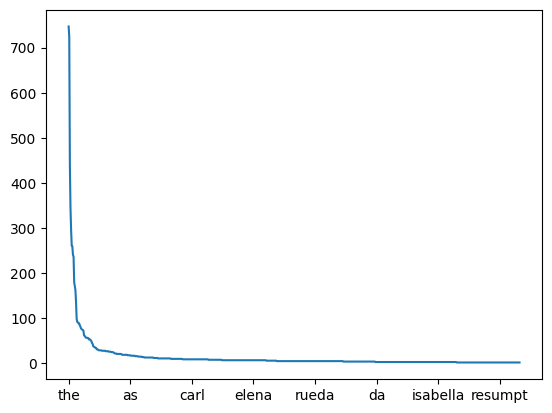

In [18]:
s.plot(kind="line")

#### Dokument 8

In [19]:
s, df = term_count(DOCUMENTS[7])
df

,data/32262848__AGENDA__20111130__EN.txt
the,223
of,203
on,151
a,127
committe,121
...,...
betwen,1
neighbourhood,1
strategi,1
favour,1


<Axes: >

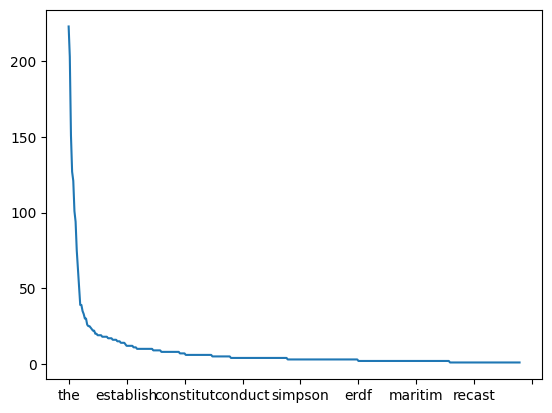

In [20]:
s.plot(kind="line")

#### Dokument 9

In [21]:
s, df = term_count(DOCUMENTS[8])
df

,data/32089495__AGENDA__20111114__EN.txt
the,561
of,467
and,352
on,297
european,206
...,...
hashemit,1
except,1
equival,1
such,1


<Axes: >

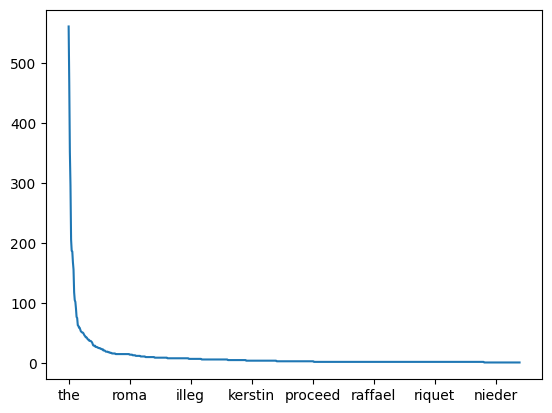

In [22]:
s.plot(kind="line")

#### Dokument 10

In [23]:
s, df = term_count(DOCUMENTS[9])
df

,data/31793410__AGENDA__20111024__EN.txt
the,398
of,360
and,332
on,300
committe,201
...,...
iv,1
v,1
vi,1
vii,1


<Axes: >

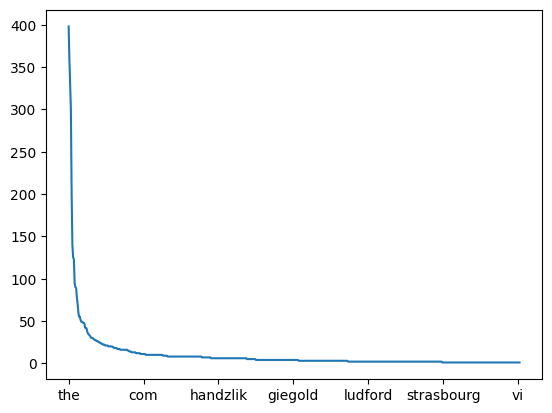

In [24]:
s.plot(kind="line")

### 6. Zbuduj stop listę wraz ze statystyką występowania słów. Usuń wyrazy ze stop listy z analizowanych tekstów. Uzasadnij, na jakiej podstawie słowa zostały sklasyfikowane jako należące do stop listy.

In [25]:
words = []
for doc in DOCUMENTS:
  with open(doc) as f:
    words.extend(re.findall(r"[a-zA-Z]+", f.read()))

s = pd.value_counts([stemmer.stem(word) for word in words], sort=True)
s.to_frame(name="Liczba wystąpień we wszystkich dokumentach")

,Liczba wystąpień we wszystkich dokumentach
the,3177
of,2844
and,2132
on,1917
committe,1287
...,...
hahn,1
ciolo,1
esther,1
are,1


In [26]:
most_common = list(s.keys())[:200]
print(most_common)

['the', 'of', 'and', 'on', 'committe', 'for', 'a', 'european', 'group', 'report', 'in', 'democrat', 'b', 'affair', 'allianc', 'amend', 'wednesday', 'resolut', 'motion', 'to', 'council', 'parliament', 's', 'europ', 'debat', 'commiss', 'eu', 'rule', 'green', 'left', 'member', 'joint', 'march', 'vote', 'liber', 'monday', 'o', 'develop', 'intern', 'by', 'novemb', 'budget', 'peopl', 'decemb', 'februari', 'econom', 'rsp', 'tuesday', 'right', 'union', 'christian', 'rapporteur', 'parti', 'progress', 'agreement', 'socialist', 'ini', 'public', 'protect', 'food', 'polici', 'health', 'unit', 'request', 'free', 'market', 'confeder', 'nordic', 'safeti', 'at', 'foreign', 'democraci', 'recommend', 'com', 'monetari', 'propos', 'with', 'repli', 'financi', 'regul', 'fisheri', 'includ', 'environ', 'trade', 'decis', 'altern', 'octob', 'call', 'roll', 'split', 'direct', 'energi', 'separ', 'consum', 'women', 'thursday', 'applic', 'civil', 'budgetari', 'social', 'freedom', 'justic', 'employ', 'i', 'cod', 'leg

Zdecydowano się usunąć wyrazy, które są popularne, ale nie wnoszą żadnych informacji.

In [27]:
STOP_WORDS = [
  "the",
  "of",
  "and",
  "on",
  "for",
  "a",
  "in",
  "to",
  "by",
  "at",
  "between",
  "as",
  "no",
  "it",
  "their",
  "from",
]

pd.DataFrame(
  data=[[sw, s[sw]] for sw in STOP_WORDS],
  columns=["Term", "Liczba wystąpień we wszystkich dokumentach"]
)

,Term,Liczba wystąpień we wszystkich dokumentach
0,the,3177
1,of,2844
2,and,2132
3,on,1917
4,for,1269
5,a,1126
6,in,623
7,to,381
8,by,170
9,at,110


### 7. Utwórz macierz częstotliwości TFM, w której element [di, ti] reprezentuje liczbę wystąpień słowa kluczowego ti w dokumencie di.
> Uwaga! Macierze nie mają zawierać słów ze stop listy.


In [28]:
corpus = []
for doc in DOCUMENTS:
  with open(doc) as f:
    words = re.findall(r"[a-zA-Z]+", f.read())
  stemmed = list(filter(lambda word: word not in STOP_WORDS, (stemmer.stem(word) for word in words)))
  corpus.append(stemmed)

counted = [pd.value_counts(doc, sort=True) for doc in corpus]
pd.DataFrame(data=counted).fillna(0).astype(int)

,committe,group,european,s,allianc,democrat,affair,april,europ,report,...,fit,codifi,shortcom,sme,test,major,compon,america,papanikolaou,appropri
0,64,61,55,35,31,31,31,25,24,21,...,0,0,0,0,0,0,0,0,0,0
1,90,17,55,12,6,6,46,0,4,76,...,0,0,0,0,0,0,0,0,0,0
2,110,80,110,29,30,33,36,0,21,60,...,0,0,0,0,0,0,0,0,0,0
3,145,107,113,29,45,48,57,0,31,44,...,0,0,0,0,0,0,0,0,0,0
4,77,22,38,22,9,9,35,0,6,54,...,0,0,0,0,0,0,0,0,0,0
5,56,44,53,7,13,17,2,0,17,15,...,0,0,0,0,0,0,0,0,0,0
6,236,260,296,81,162,179,90,0,88,98,...,0,0,0,0,0,0,0,0,0,0
7,121,19,63,25,6,10,51,0,4,75,...,0,0,0,0,0,0,0,0,0,0
8,187,156,206,35,91,77,33,0,62,102,...,0,0,0,0,0,0,0,0,0,0
9,201,95,123,49,55,60,78,0,49,89,...,1,1,1,1,1,1,1,1,1,1


### 8. Utwórz podobną macierz do powyższej, ale tym razem użyj miary tf-idf.

In [ ]:
# TODO